In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report 
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [4]:
df = pd.read_csv('cleaned_titanic.csv')

In [5]:
df = pd.get_dummies(df, columns = ['Sex','Embarked','AgeGroup'], drop_first = True)

In [6]:
df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [7]:
x = df.drop('Survived', axis = 1)
y = df['Survived']

In [8]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,isAlone,Familysize,Sex_male,Embarked_Q,Embarked_S,AgeGroup_Senior,AgeGroup_Young Adult,AgeGroup_child,AgeGroup_teen
0,0,3,22.0,1,0,7.2500,2,0,2,True,False,True,False,True,False,False
1,1,1,38.0,1,0,71.2833,2,0,2,False,False,False,False,False,False,False
2,1,3,26.0,0,0,7.9250,1,1,1,False,False,True,False,True,False,False
3,1,1,35.0,1,0,53.1000,2,0,2,False,False,True,False,True,False,False
4,0,3,35.0,0,0,8.0500,1,1,1,True,False,True,False,True,False,False


In [9]:
x_train , x_test , y_train , y_test = train_test_split(
    x,y,test_size = 0.2 , random_state = 42
)

In [10]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8044692737430168


In [12]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[90 15]
 [20 54]]


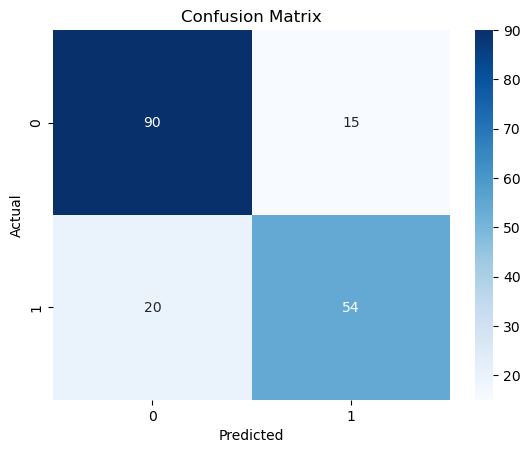

In [13]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [14]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
y_pred = rf.predict(x_test)

Accuracy: 0.8212290502793296


<Axes: >

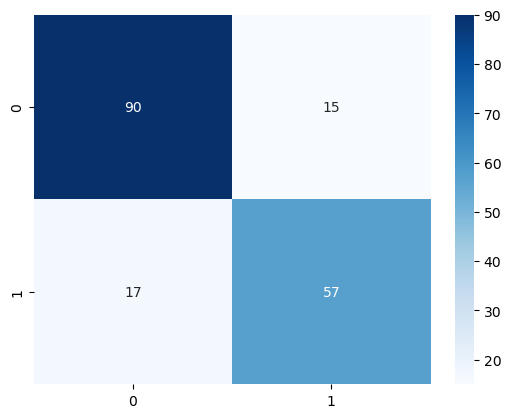

In [16]:
print('Accuracy:' , accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap='Blues')

In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [18]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

In [19]:
for name,model in models.items():
    scores = cross_val_score(model, x, y , cv = 5)
    print(f'{name}: Mean Accuracy = {scores.mean(): .4f}')

Logistic Regression: Mean Accuracy =  0.8002
Decision Tree: Mean Accuracy =  0.7700


C:\Users\aadim\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aadim\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Random Forest: Mean Accuracy =  0.8059
SVM: Mean Accuracy =  0.6791


In [20]:
param_grid = {
    'n_estimators' : [100,200,300],
    'max_depth' : [None, 5 , 10],
    'min_samples_split' : [2 , 5 , 10],
    'min_samples_leaf' : [1, 2 , 4]
}

In [21]:
rf = RandomForestClassifier(random_state = 42)

grid_search = GridSearchCV(
    estimator = rf,
    param_grid = param_grid,
    cv = 5,
    scoring = 'accuracy',
    n_jobs = -1,
    verbose = 2
)


In [22]:
grid_search.fit(x_train , y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [23]:
print('Best Parameters: ', grid_search.best_params_)
print('Best Score: ', grid_search.best_score_)

Best Parameters:  {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Score:  0.8384319905446667


## 🔍 What is GridSearchCV?

GridSearchCV helps us find the **best combination of hyperparameters** for our model by trying all possible combinations and selecting the one with the highest performance.

### 🧠 Breakdown of the Code:
```python
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')


In [25]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(x_test)

print('Accuracy: ', accuracy_score(y_test, y_pred_best))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_best))
print('CLassification Report:\n', classification_report(y_test, y_pred_best))

Accuracy:  0.8156424581005587
Confusion Matrix:
 [[94 11]
 [22 52]]
CLassification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.83      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



In [26]:
X = df.drop('Survived', axis=1)
y = df['Survived']


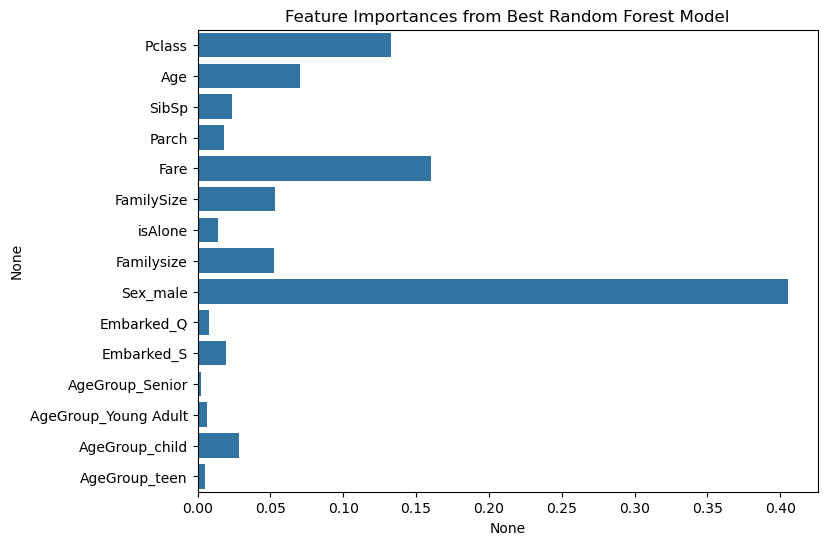

In [27]:
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importances from Best Random Forest Model")
plt.show()


In [28]:
log_reg = LogisticRegression(max_iter = 1000)
param_grid_log = {
    'C' : [0.01, 0.1, 1,10],
    'penalty' : ['l2'],
    'solver' : ['lbfgs']
}

grid_log = GridSearchCV(estimator = log_reg, param_grid = param_grid_log , cv = 5, scoring = 'accuracy' )
grid_log.fit(x_train, y_train)

best_log_model = grid_log.best_estimator_
print("Best Logistic Regression Model:", best_log_model)

Best Logistic Regression Model: LogisticRegression(C=10, max_iter=1000)


C:\Users\aadim\AppData\Local\Temp\ipykernel_9736\208812518.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef_df.values, y=coef_df.index, palette="coolwarm")


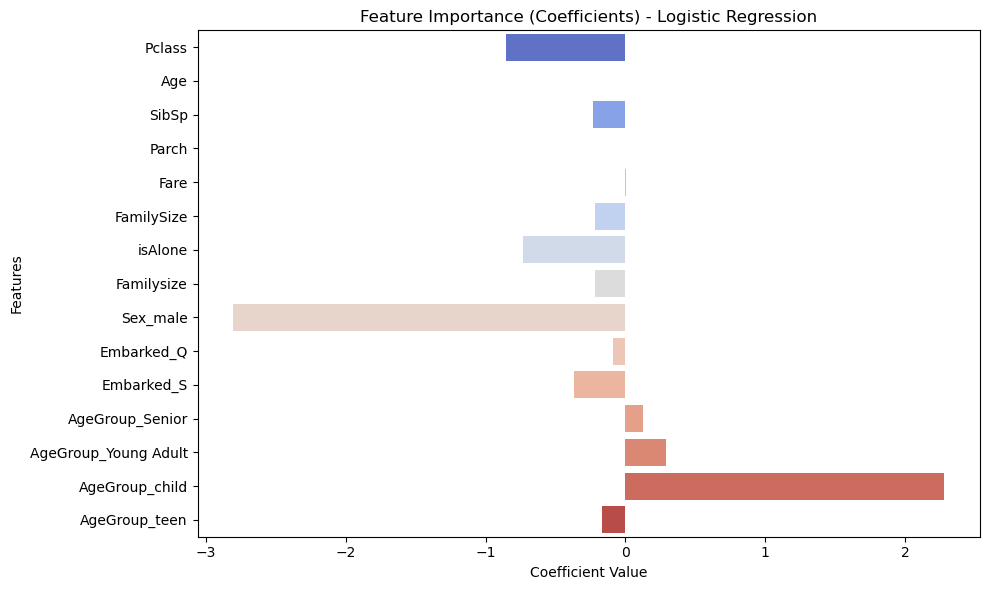

In [57]:
coefficients = best_log_model.coef_[0]
feature_names = X.columns
coef_df = pd.Series(coefficients, index=feature_names)
plt.figure(figsize=(10, 6))
sns.barplot(x=coef_df.values, y=coef_df.index, palette="coolwarm")
plt.title('Feature Importance (Coefficients) - Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.tight_layout()
plt.show()
